In [1]:
## IMPORTING REQUIRED LIBARY 
import pandas as pd
import numpy as  np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
##LOAIDNG THE DATASET 
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
### CHECKING FOR DUPLICATES AND DATA TYPES
dup = df.duplicated().sum()
df.dtypes.value_counts()

object     7
float64    6
bool       1
Name: count, dtype: int64

In [4]:
### UNIQUENESS OF EACH COLUMN
for i in df.columns:
    uniq = df[i].nunique()
    print(f'{i} column has {uniq} elements ')

PassengerId column has 8693 elements 
HomePlanet column has 3 elements 
CryoSleep column has 2 elements 
Cabin column has 6560 elements 
Destination column has 3 elements 
Age column has 80 elements 
VIP column has 2 elements 
RoomService column has 1273 elements 
FoodCourt column has 1507 elements 
ShoppingMall column has 1115 elements 
Spa column has 1327 elements 
VRDeck column has 1306 elements 
Name column has 8473 elements 
Transported column has 2 elements 


In [5]:

df = df.drop(['PassengerId'], axis = 1 )
test = test.drop(['PassengerId'], axis = 1 )

numerical = df.select_dtypes(include = [np.number])
categorical = df.select_dtypes(include = ['object'])


<Axes: title={'center': 'counts of null values'}>

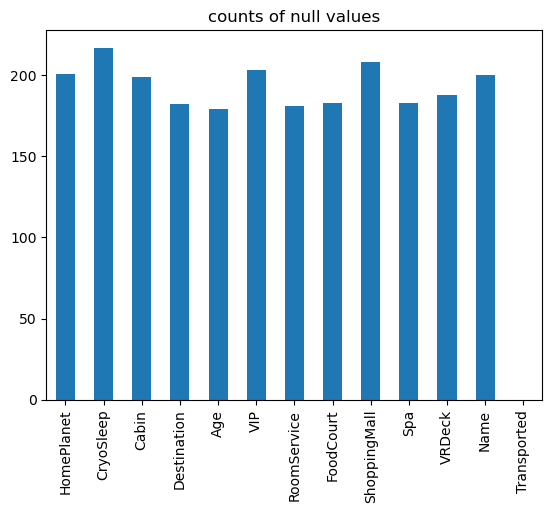

In [6]:
###CHECKING FOR NULL VALUES 
null = df.isna().sum()
plt.title(f'counts of null values')
null.plot(kind = 'bar')

In [7]:
### IMPUTATION OF NULL VALUES
for num in numerical.columns:
    ### imputation of nul values in numerical columns
    median = df[num].median()
    df[num] = df[num].fillna(median)
    
    median_ = test[num].median()
    test[num] = test[num].fillna(median_)

In [8]:
for cat in categorical.columns:
    ### imputing of null in categorical features
    mode = df[cat].mode()
    df[cat] = df[cat].fillna(mode[0])
    
    Mode = test[cat].mode()
    test[cat] = test[cat].fillna(Mode[0])
    

In [9]:
nul =df.isna().sum()
nul

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

# DATA VISUALIZATION


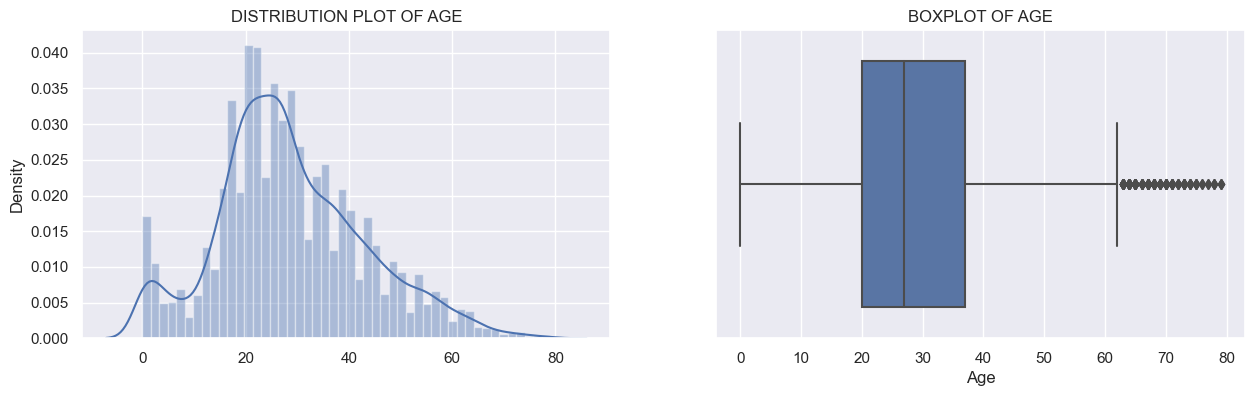

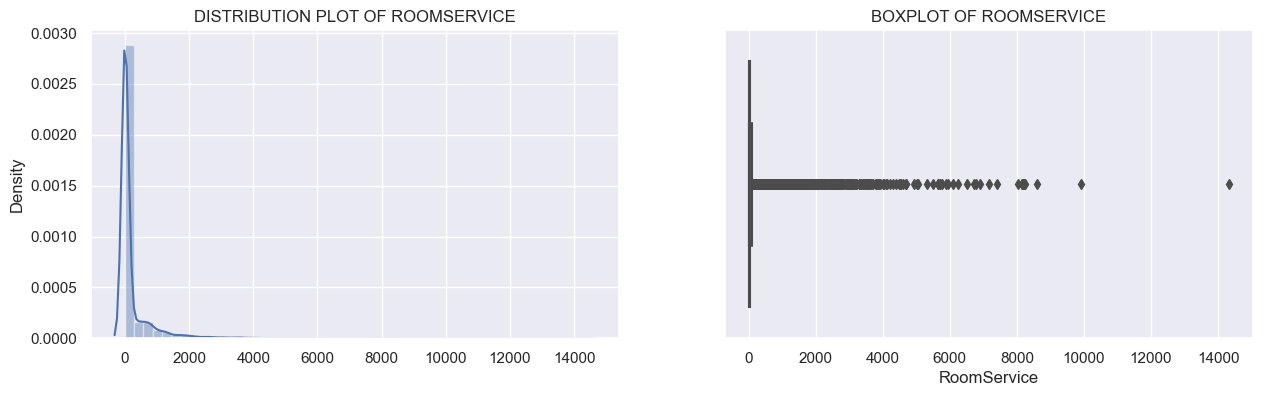

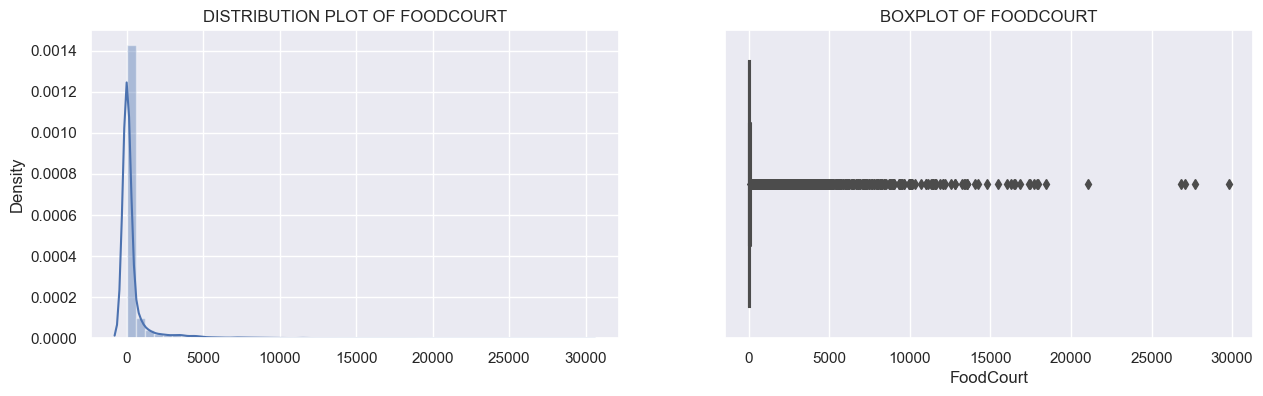

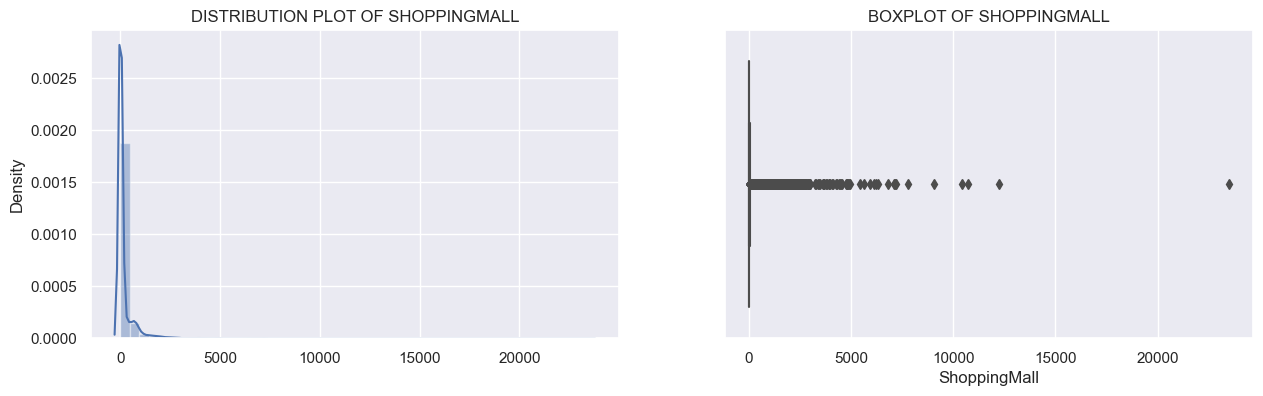

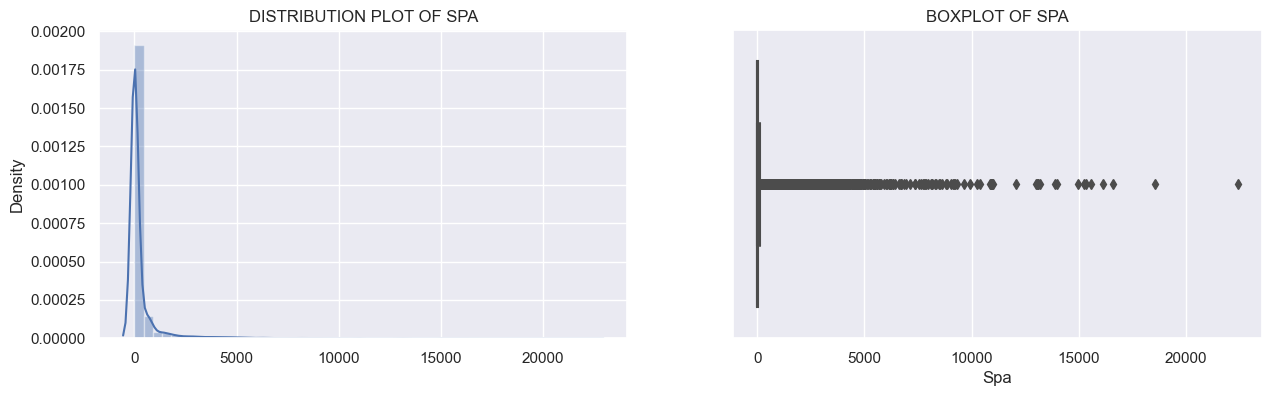

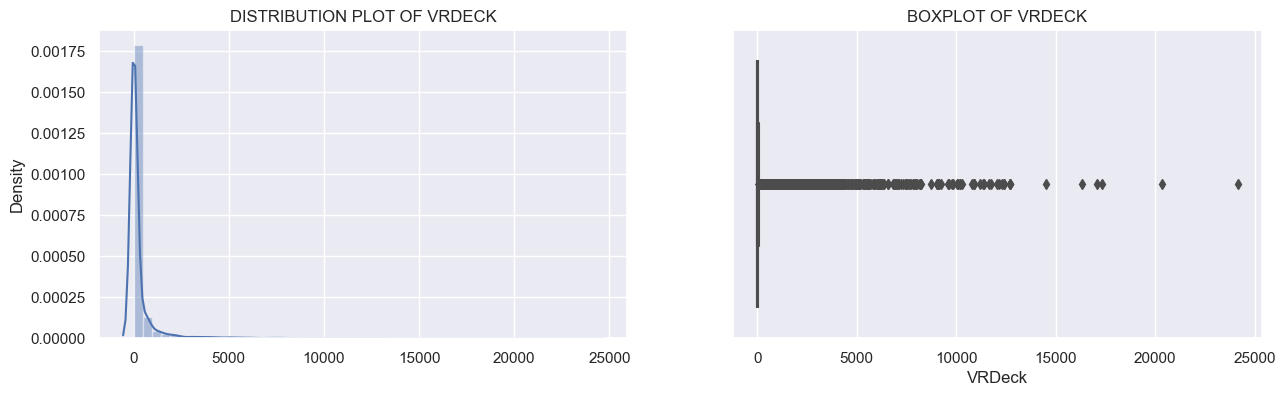

In [10]:

numerical = df.select_dtypes(include=[np.number])
for num in numerical.columns:
    sns.set()
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title(f'DISTRIBUTION PLOT OF {num}'.upper())
    sns.distplot(x = df[num])
    
    plt.subplot(1,2,2)
    plt.title(f'BOXPLOT OF {num}'.upper())
    sns.boxplot(x = df[num])
    
    

From the above code only the age column seem to be normally distributed.
while others columns are highly skewed. 


In [11]:
##skewness of  each numerical coolunm
numerical.skew()

Age              0.431102
RoomService      6.397766
FoodCourt        7.177515
ShoppingMall    12.763842
Spa              7.716450
VRDeck           7.904554
dtype: float64

In [12]:
###SKEW COLUMNS
skew_columns = numerical.skew().sort_values(ascending = False)
skew_columns = skew_columns.loc[skew_columns > 0.6]
skew_columns

ShoppingMall    12.763842
VRDeck           7.904554
Spa              7.716450
FoodCourt        7.177515
RoomService      6.397766
dtype: float64

One way to address skewness is to use logarithm function from numpy

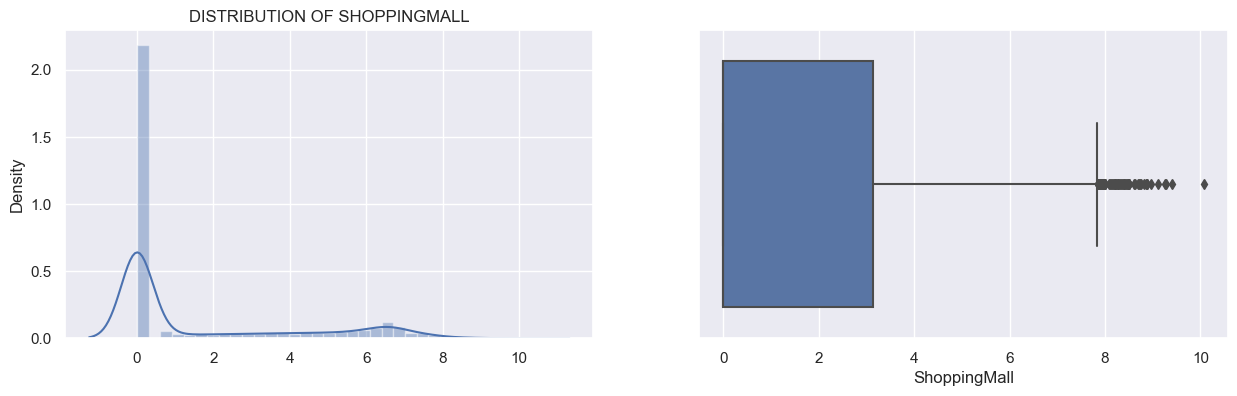

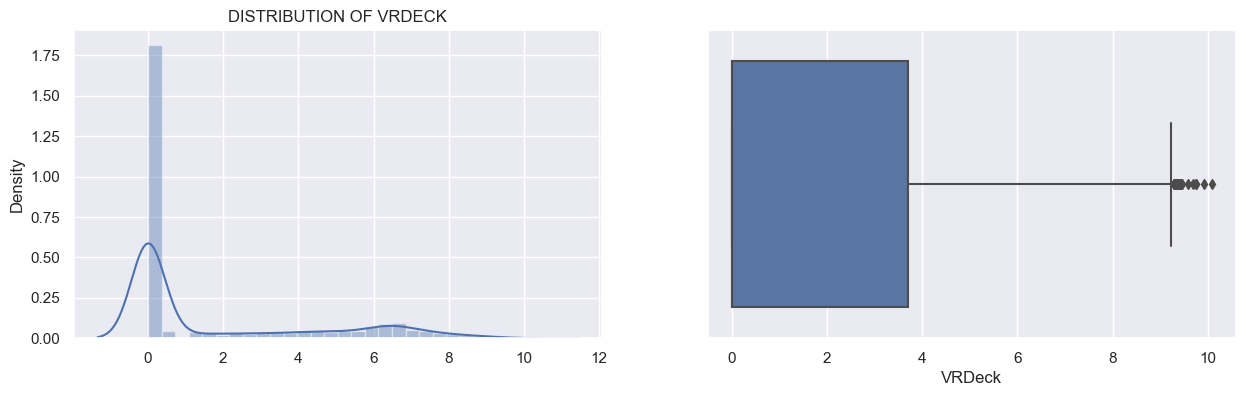

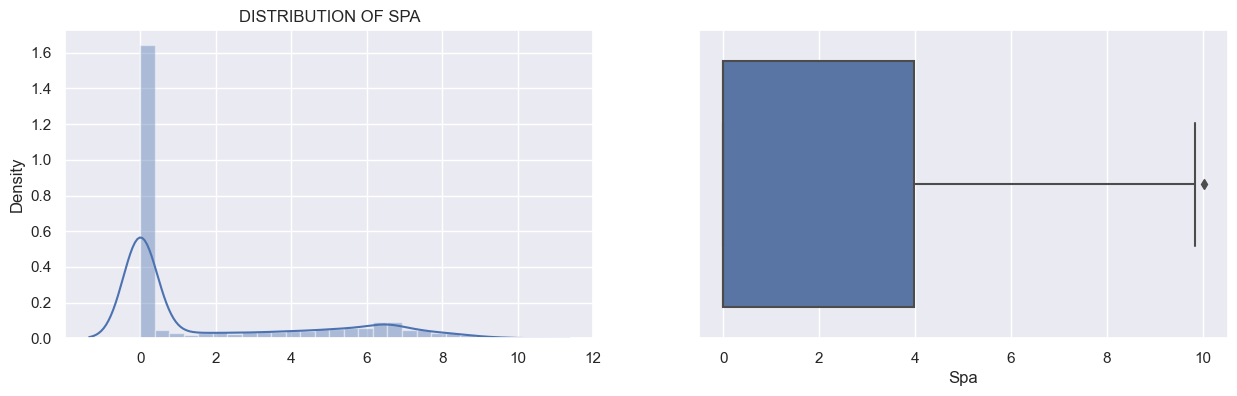

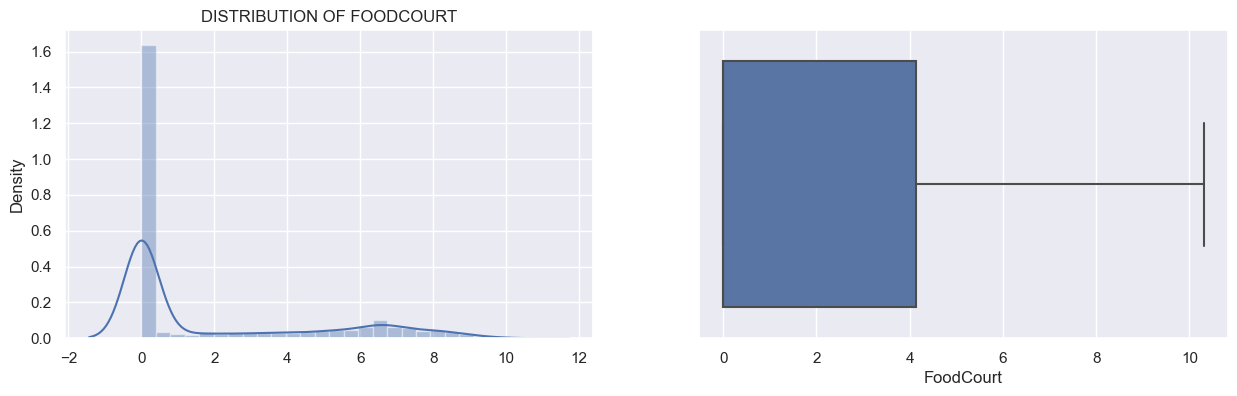

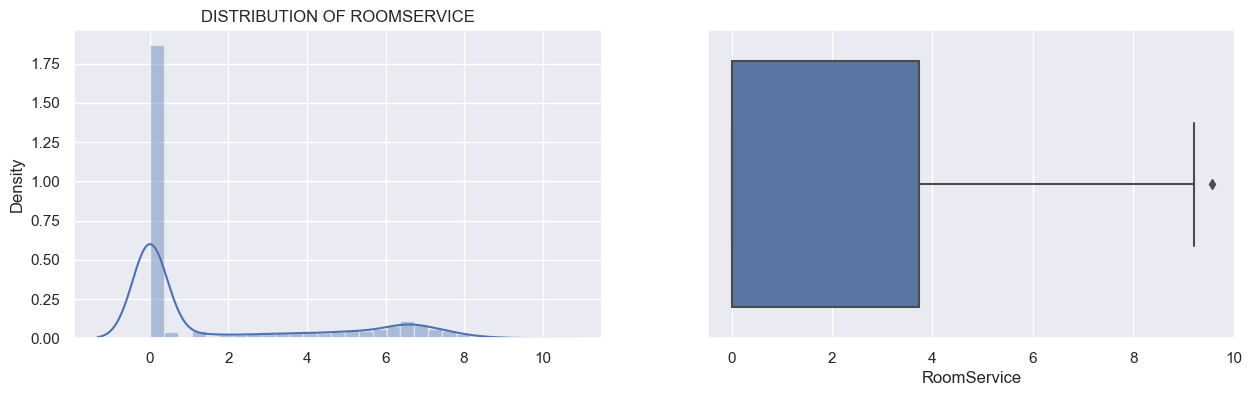

In [13]:
for num  in skew_columns.index:
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title(f'distribution of {num}'.upper())
    sns.distplot(x = np.log(df[num] + 1))
    
    plt.subplot(1,2,2)
    sns.boxplot(x = np.log(df[num]+ 1))
    
for num  in skew_columns.index:
    df[num] = np.log(df[num] + 1)
    
    
    test[num] = np.log(test[num] + 1 )
     

In [17]:
df.select_dtypes(include =[np.number]).skew()
### there is reduction the skewness of the columns 

Age             0.431102
RoomService     1.149866
FoodCourt       1.143177
ShoppingMall    1.238498
Spa             1.122324
VRDeck          1.193417
dtype: float64

In [14]:
col = [x for x in numerical.columns ]
### checking for multicolinearity 
corr_mat = df[col].corr()
corr_mat
#corr_mat.abs().idxmax()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.118123,0.195554,0.094669,0.182026,0.163787
RoomService,0.118123,1.000000,0.089932,0.360944,0.147172,0.093881
FoodCourt,0.195554,0.089932,1.000000,0.101125,0.422935,0.458097
ShoppingMall,0.094669,0.360944,0.101125,1.000000,0.157689,0.100043
Spa,0.182026,0.147172,0.422935,0.157689,1.000000,0.375308
VRDeck,0.163787,0.093881,0.458097,0.100043,0.375308,1.000000


From the correlation matrix we can see that there is no strong correlation between the variables.

In [18]:
###FEATURE ENGINERING ON CABIN COLUMN

df[['cabinDesk', 'cabinNo', 'cabinSide']] = df['Cabin'].str.split('/', expand = True)
test[['cabinDesk', 'cabinNo', 'cabinSide']] = test['Cabin'].str.split('/', expand = True)

In [19]:
df = df.drop(['cabinNo', 'Cabin', 'Name'], axis = 1 )
test = test.drop(['cabinNo', 'Cabin', 'Name'], axis = 1 )

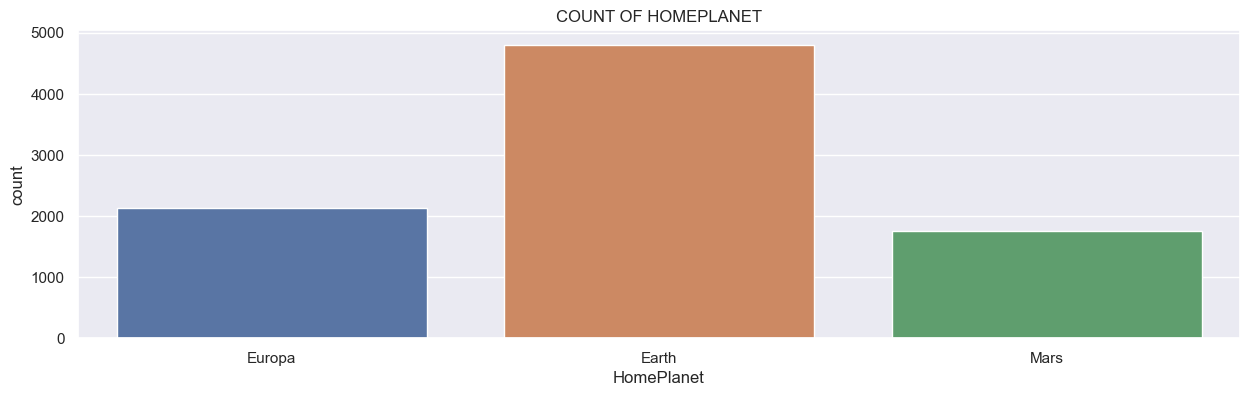

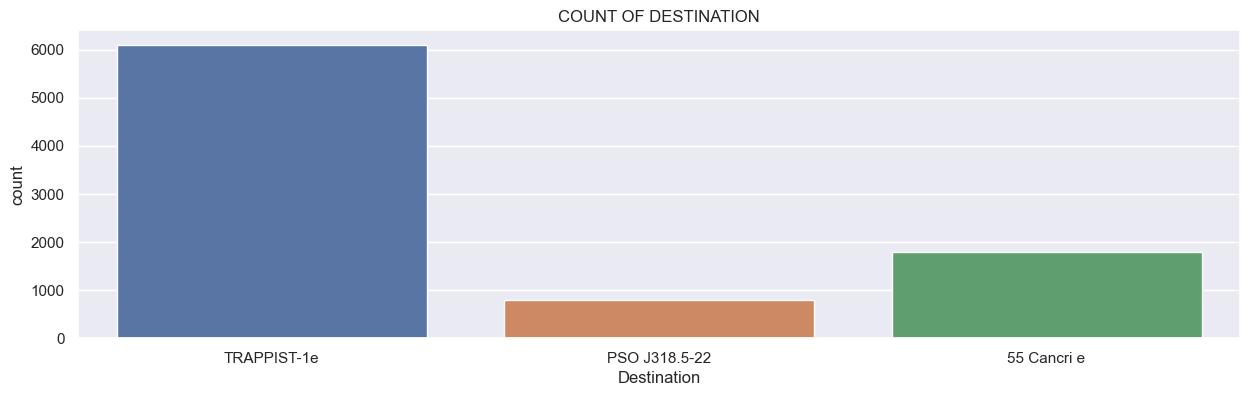

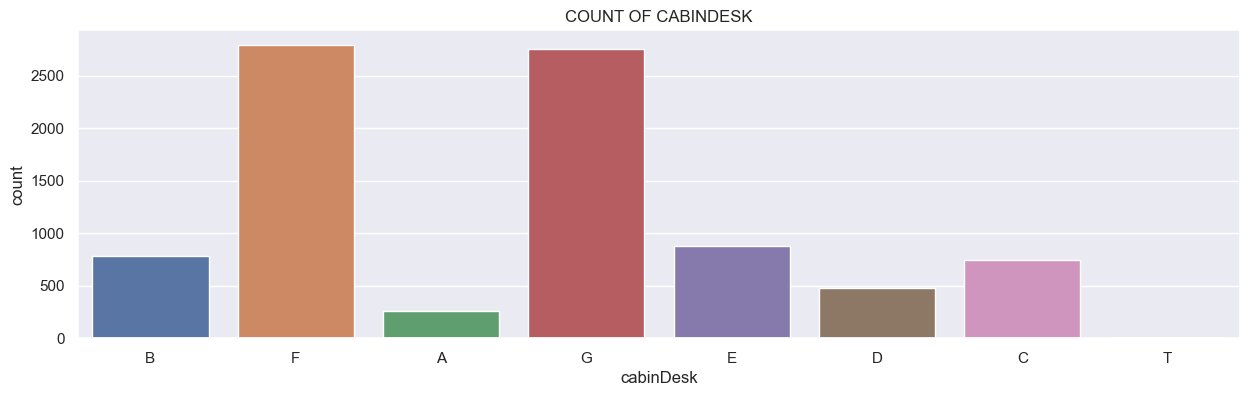

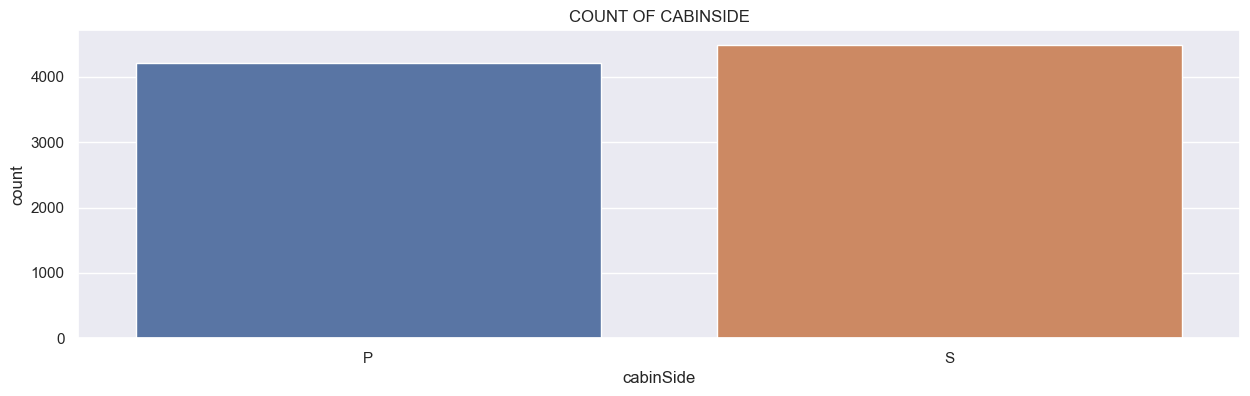

In [20]:
###EDA ON THE CATEGORICAL COLUMNS 

categorical = df.select_dtypes(include = ['object'])
for cat in categorical.columns:
    plt.figure(figsize=(15,4))
    plt.title(f'count of {cat}'.upper() )
    sns.countplot(x = df[cat])

In [21]:
###ENCODING THE TARGET COLUMN (FALSE = 0 AND TRUE = 1)
mapp = {False: 0,
       True : 1}
df['Transported'] = df['Transported'].map(mapp)

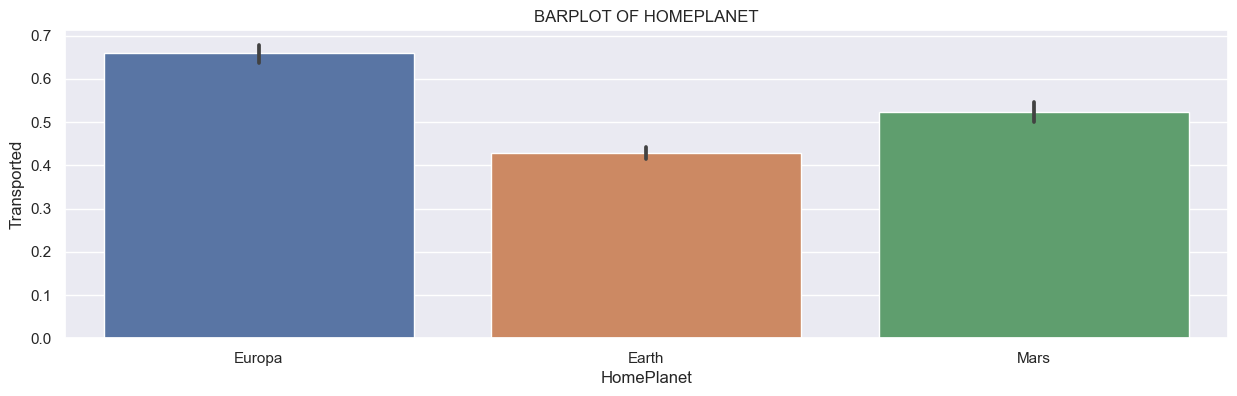

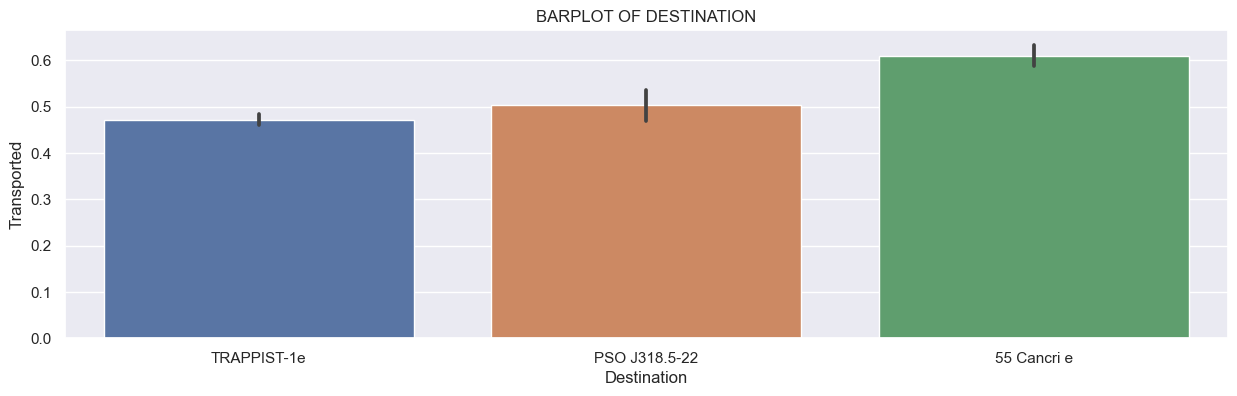

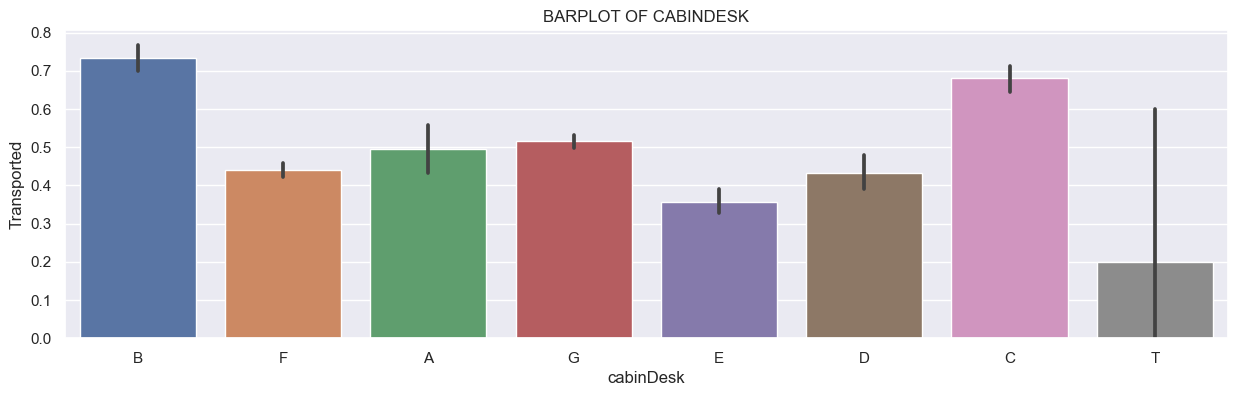

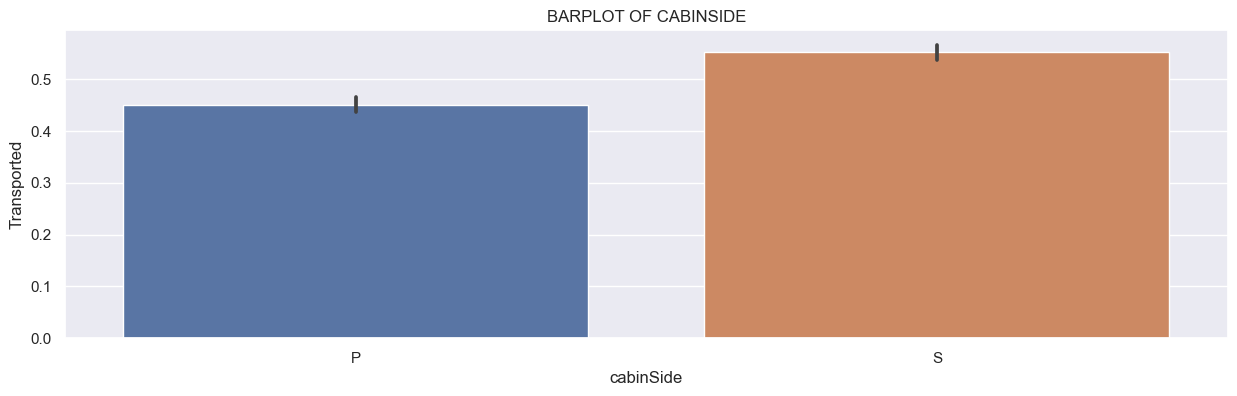

In [22]:
###BARPLOT
categorical = df.select_dtypes(include = ['object'])
for cat in categorical.columns:
    plt.figure(figsize=(15,4))
    plt.title(f'barplot of {cat}'.upper() )
    sns.barplot(x = df[cat], y = df['Transported'])

# FEATURE ENGINEEIRNG

In [23]:
def position (data):
    if (data['Destination'] == 'TRAPPIST-1e') & (data['HomePlanet'] == 'Earth'):
        return 1 
    else:
        return 0
df['position']  = df.apply(lambda df : position(df), axis = 1 )   
test['position']  = test.apply(lambda test : position(test), axis = 1 )   

In [24]:
def pladest (data):
    if (data['HomePlanet'] == 'Europa' ) & (data['Destination'] == '55 Cancri e'):
        return 1
    else:
        return 0
    
df['pladest']  = df.apply(lambda df : pladest(df), axis = 1 )  
test['pladest']  = test.apply(lambda test : pladest(test), axis = 1 )

In [25]:
def bestcabin (data):
    if (data['cabinSide'] == 'S') & (data['cabinDesk'] == 'B'):
        return 1
    else:
        return 0
df['bestcabin'] = df.apply(lambda df: bestcabin(df), axis = 1 )
test['bestcabin'] = test.apply(lambda test: bestcabin(test), axis = 1 )

#SECOND
def bestdek (data):
    if (data['cabinDesk'] == 'C') | (data['cabinDesk'] == 'B'):
        return 1
    else:
        return 0
df['bestdesk'] = df.apply(lambda df: bestdek(df), axis = 1 )
test['bestdesk'] = test.apply(lambda test: bestdek(test), axis = 1 )




<Axes: xlabel='Age'>

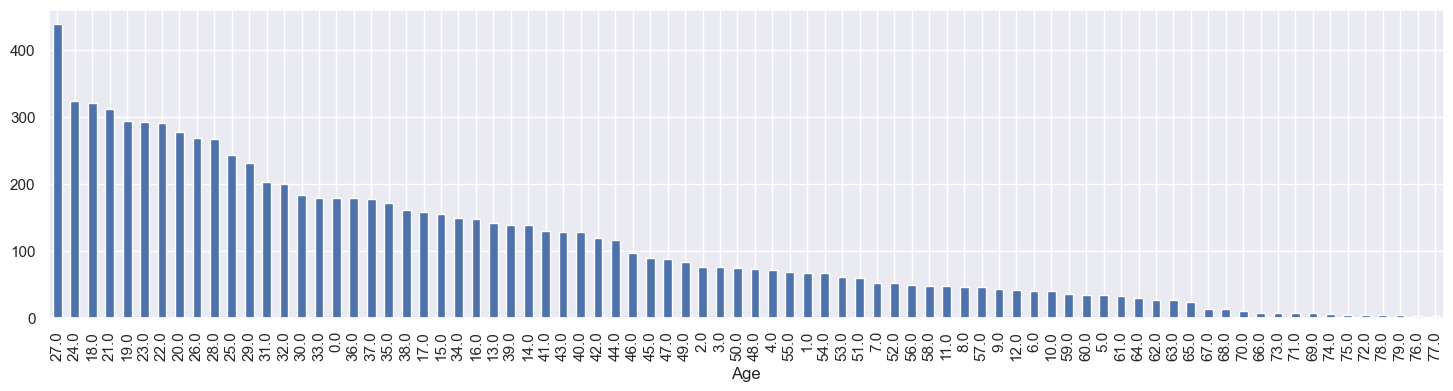

In [26]:
cont = df['Age'].value_counts()
plt.figure(figsize=(18,4))
cont.plot(kind = 'bar')

In [27]:
def vulnerable (data):
    if (data['Age'] >=60 ) | (data['Age'] <= 15):
        return 1
    else :
        return 0
    
df['most_vunerable'] = df.apply(lambda df : vulnerable(df), axis = 1 )   
test['most_vunerable'] = test.apply(lambda test : vulnerable(test), axis = 1 )


In [28]:
df['service'] = df['RoomService'] + df['ShoppingMall'] + df['Spa']
test['service'] = test['RoomService'] + test['ShoppingMall'] + test['Spa']

df['new_service'] = df['VRDeck'] * df['service']
test['new_service'] = test['VRDeck'] * test['service']

In [29]:
def richpp (data):
    if data['VIP'] == True and data['Age'] >= 18 :
        return 1
    else:
        return 0
df['richpp'] = df.apply(lambda df: richpp(df), axis = 1 )  
test['richpp'] = test.apply(lambda test: richpp(test), axis = 1 ) 

In [30]:
from sklearn.preprocessing import OrdinalEncoder

order_col = [x for x in categorical.columns if x not in ['CryoSleep','cabinSide','VIP'  ]]
for col in order_col:
    ordinal = OrdinalEncoder()
    df[col] = ordinal.fit_transform(df[[col]])
    test[col] = ordinal.fit_transform(test[[col]])
    
df['VIP']   = df['VIP'].map({False :0,
                            True : 1 }) 
test['VIP']   = test['VIP'].map({False :0,
                            True : 1 }) 

df['CryoSleep'] =df['CryoSleep'].map({False :0,
                                     True:1}) 
test['CryoSleep'] =test['CryoSleep'].map({False :0,
                                     True:1}) 

df['cabinSide'] =df['cabinSide'].map({'P' :0,
                                     'S':1}) 
test['cabinSide'] =test['cabinSide'].map({'P' :0,
                                     'S':1}) 

In [30]:
###CONVERTING CRYOSLEEP AND VIP COLUMNS FROM BOOLEAN TO OBJECT TYPE
df ['CryoSleep'] = df['CryoSleep'].astype('object')
df ['VIP'] = df['VIP'].astype('object')


test['CryoSleep'] = test['CryoSleep'].astype('object')
test ['VIP'] = test['VIP'].astype('object')

<Axes: title={'center': 'COUNTPLOT OF THE TARGET COLUMNS'}, xlabel='Transported', ylabel='count'>

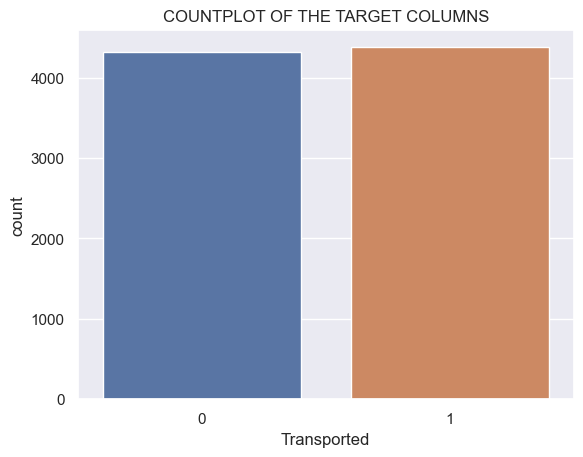

In [32]:
plt.title(f'COUNTPLOT OF THE TARGET COLUMNS')
sns.countplot(x =df['Transported'])


In [29]:
df['Transported'].value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

In [ ]:
THE TARGET COLUMN IS WELL DISTRIBUTED AS A BALANCE COLUMN AND HAVING A BINARY CLASSIFICATION  

In [34]:
#df = df.drop(columns = ['VIP'] )
#test = test.drop(columns = ['VIP'] )

#DUMMY ENCODING

df = pd.get_dummies(df, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# BUILDING THE  MODEL

In [35]:
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from collections import Counter

scaler = StandardScaler()
X = df.drop(columns = ['Transported'] )
y = df['Transported']

In [38]:
#### model development
model = CatBoostClassifier(n_estimators=100)
scaler = StandardScaler()

### kfold
#kf = StratifiedKFold(n_splits=10, random_state=1000, shuffle=True)
kf = KFold(n_splits=10, random_state=1200, shuffle=True)


### create array to store prediction 
oof = np.zeros((len(X)))
oof1 = np.zeros((len(X)))
predict = np.zeros((len(test)))  


###iteration over the fold
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    # Fit the model on the training data
    model.fit(X_train, y_train, eval_set = [(X_test, y_test)],verbose=0, early_stopping_rounds=100)
    
       # Predict on the validation set
    vp2 = model.predict(X_test)
    #vp = model.predict(X_test)
    #vp1 = (vp2)
    
     # Calculate the validation score as the root mean squared error between the true values and predictions
    val_score = accuracy_score((y_test), (vp2))
    print(f'\nFold {fold+1} Val score: {val_score}\n')
    
    
      # Predict on the test set
    tp = model.predict(test)

    # Store the validation predictions in the oofs array
    #oof[test_index] = vp1
    oof1[test_index] = vp2
    # Average the predictions over the 10 folds and store in the preds array
    predict += tp/10

# Calculate the out-of-fold score as the root mean squared error between the true values and predictions 0.704879757179547
#oof_score = accuracy_score((y), (oof))
#print(f'\nOOF Accurancy score is : {oof_score}')
           
    
    


Fold 1 Val score: 0.7816091954022989


Fold 2 Val score: 0.8183908045977012


Fold 3 Val score: 0.825287356321839


Fold 4 Val score: 0.8216340621403913


Fold 5 Val score: 0.7963176064441887


Fold 6 Val score: 0.8239355581127733


Fold 7 Val score: 0.8055235903337169


Fold 8 Val score: 0.8216340621403913


Fold 9 Val score: 0.7779056386651323


Fold 10 Val score: 0.806674338319908



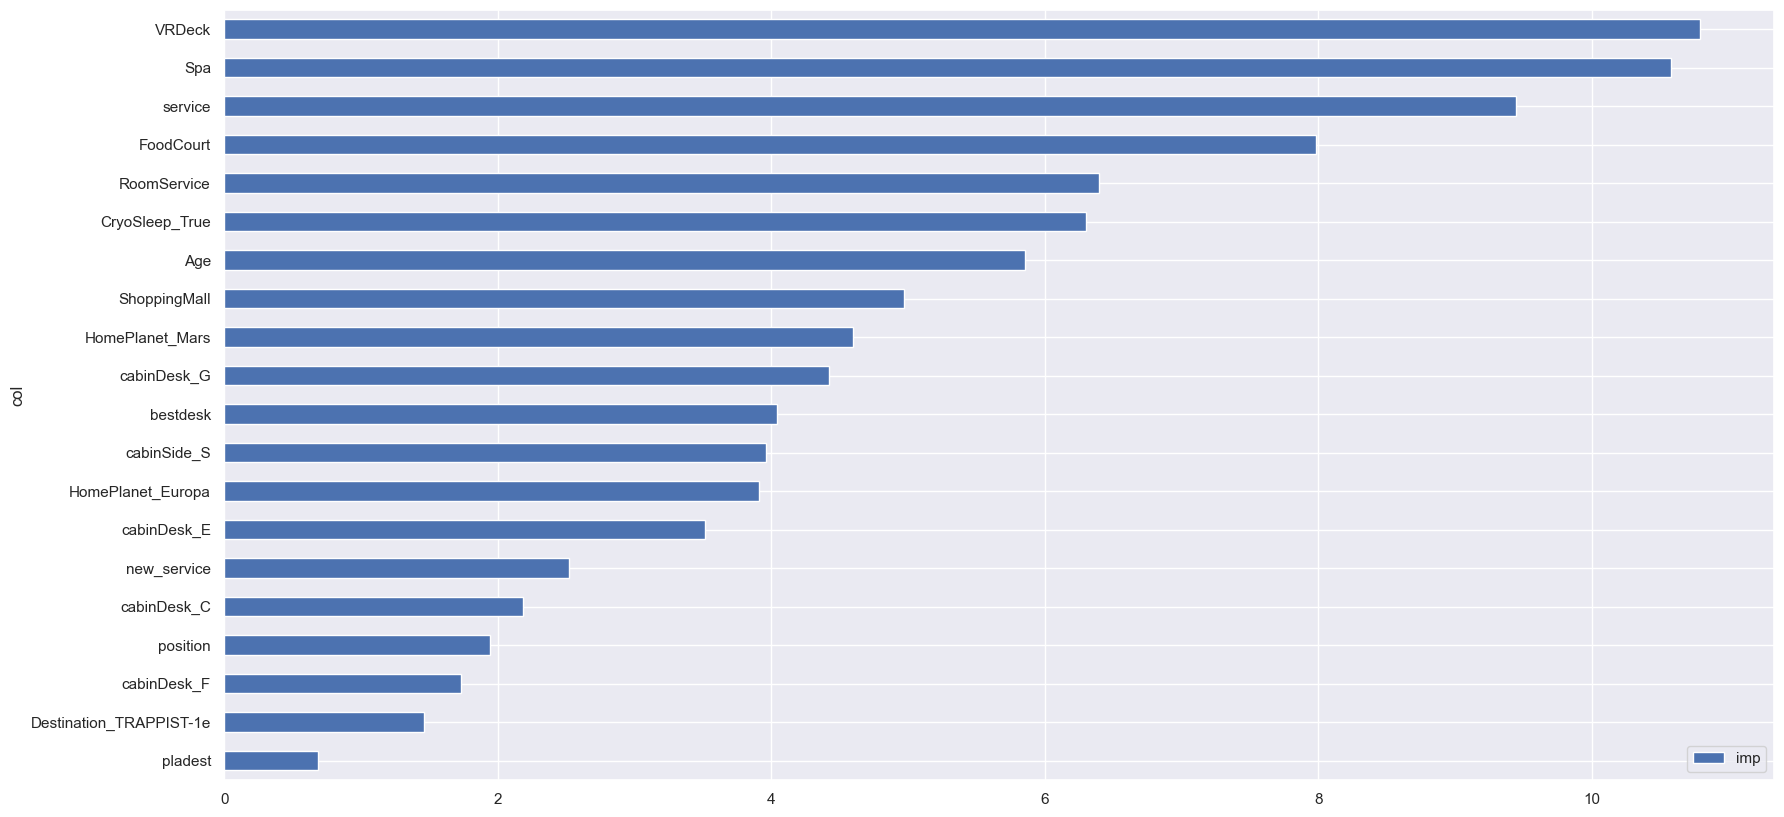

In [37]:
### FEATURES IMPORTANCE
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))